In [ ]:
from google.colab import drive
drive.mount('/content/image_drive')

Drive already mounted at /content/image_drive; to attempt to forcibly remount, call drive.mount("/content/image_drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

(250, 250)


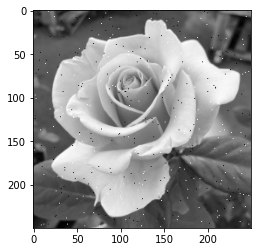

In [ ]:
img_path = '/content/image_drive/MyDrive/image/snp_rose.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
plt.imshow(img, cmap='gray')

Mean filter

(250, 250)


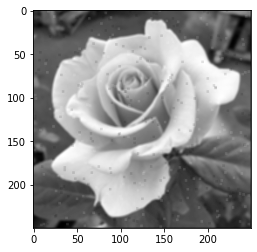

In [ ]:
#Arithmetic 
out_img = img.copy()
filter_size = 3
x = (int)(filter_size/2)
print(img.shape)
n = filter_size * filter_size
pad_img = np.pad(img,((x,x),(x,x)), mode='constant')
r = pad_img.shape[0]
c = pad_img.shape[1]
for i in range(x,r-x):
  for j in range(x,c-x):
    Sum = 0
    for k in range(-1*(x),filter_size-x):
      for l in range(-1*(x),filter_size-x):
        Sum = Sum + pad_img.item(i+k,j+l)

    Avg = float(Sum/n)
    out_img.itemset((i-x,j-x),Avg)
plt.imshow(out_img, cmap='gray')

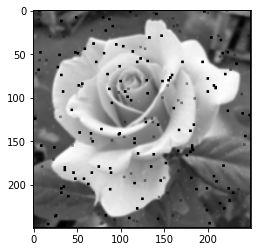

In [ ]:
#Geometric Mean Filter
for i in range(x,r-x):
  for j in range(x,c-x):
    Mul = 1
    for k in range(-1*(x),filter_size-x):
      for l in range(-1*(x),filter_size-x):
        Mul = Mul * pad_img.item(i+k,j+l)

    Geo = Mul**(1.0/(float(n)))
    out_img.itemset((i-x,j-x),Geo)
plt.imshow(out_img, cmap='gray')

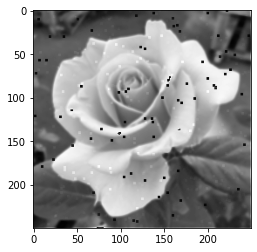

In [ ]:
#Harmonic Mean Filter
for i in range(x,r-x):
  for j in range(x,c-x):
    Isum = 0.00000000000001
    for k in range(-1*(x),filter_size-x):
      for l in range(-1*(x),filter_size-x):
        Is = 0.0 if pad_img.item(i+k,j+l) == 0 else 1/float(pad_img.item(i+k,j+l))
        Isum = Isum + Is
        
    Har = float(n/Isum)
    out_img.itemset((i-x,j-x),Har)
plt.imshow(out_img, cmap='gray')

Order Statistics Filter

In [ ]:
def median(a):
	a.sort()
	mid = len(a)//2
	return a[mid]

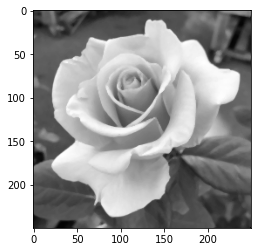

In [ ]:
#Median Filter
for i in range(x,r-x):
  for j in range(x,c-x):
    List = []
    for k in range(-1*(x),filter_size-x):
      for l in range(-1*(x),filter_size-x):
        List.append(pad_img.item(i+k,j+l))

    out_img.itemset((i-x,j-x),median(List))
plt.imshow(out_img, cmap='gray')

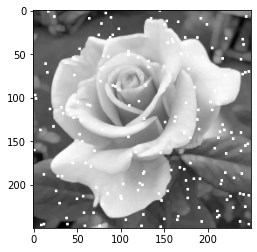

In [ ]:
#Max Filter
for i in range(x,r-x):
  for j in range(x,c-x):
    Max = 0
    for k in range(-1*(x),filter_size-x):
      for l in range(-1*(x),filter_size-x):
        Max = pad_img.item(i+k,j+l) if (pad_img.item(i+k,j+l)) > Max else Max

    out_img.itemset((i-x,j-x),Max)
plt.imshow(out_img, cmap='gray')

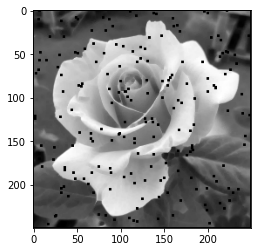

In [ ]:
#Min Filter
for i in range(x,r-x):
  for j in range(x,c-x):
    Min = 255
    for k in range(-1*(x),filter_size-x):
      for l in range(-1*(x),filter_size-x):
        Min = pad_img.item(i+k,j+l) if (pad_img.item(i+k,j+l)) < Min else Min 

    out_img.itemset((i-x,j-x),Min)
plt.imshow(out_img, cmap='gray')

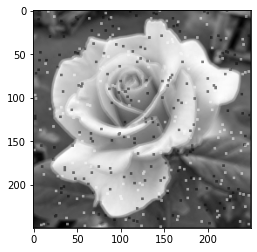

In [ ]:
#Midpoint Filter
for i in range(x,r-x):
  for j in range(x,c-x):
    Max = 0
    Min = 255
    for k in range(-1*(x),filter_size-x):
      for l in range(-1*(x),filter_size-x):
        Max = pad_img.item(i+k,j+l) if (pad_img.item(i+k,j+l)) > Max else Max 
        Min = pad_img.item(i+k,j+l) if (pad_img.item(i+k,j+l)) < Min else Min

    out_img.itemset((i-x,j-x),(Max+Min)/2)
plt.imshow(out_img, cmap='gray')